In [ ]:
import pandas as pd 

# Set display options to show the full DataFrame 
pd.set_option('display.max_rows', None) # Show all rows 
pd.set_option('display.max_columns', None) # Show all columns 
pd.set_option('display.width', None) # Adjust the width to fit all columns 

dir_test = "/home/juliantearney/Downloads/" # For PC 
df = pd.read_table(dir_test+'cdfs_v1_6_11.cat', sep=' ') 

# Display the table 
print(df)

In [8]:
import pandas as pd
dir_test = "/home/juliantearney/Downloads/"
c_m_n = pd.read_csv(dir_test+'/control_morphology_nonparametric_multisource.csv')
c_m_n_new =c_m_n[(c_m_n['flag_o3']<=1) & (c_m_n['flag_f210']<=1) & (c_m_n['flag_f180']<=1) & (c_m_n['gini_f180']!=-99) & (c_m_n['gini_o3']!=-99) & (c_m_n['zfourge_id']!=15287.0)]
e_m_n = pd.read_csv(dir_test+'/eelg_morphology_nonparametric_multisource.csv')
e_m_n_new=e_m_n[(e_m_n['flag_o3']<=1) & (e_m_n['flag_f210']<=1) & (e_m_n['flag_f180']<=1) & (e_m_n['gini_o3']!=-99)]

In [9]:

c_m_n_reclass = c_m_n_new.copy()
e_m_n_reclass = e_m_n_new.copy()

# Combine the two DataFrames and sort them by 'zfourge_id'
combined = pd.concat([c_m_n_reclass, e_m_n_reclass], ignore_index=True)
sorted_combined = combined.sort_values(by='zfourge_id')

# Get the 'zfourge_id' column
sord_combined_ids = sorted_combined['zfourge_id']

# Use a set to avoid duplicate IDs
unique_ids = set()

# Convert the IDs to integers and add them to the set
for id in sord_combined_ids:
    unique_ids.add(int(id))

# Convert the set back to a sorted list
int_ids = sorted(list(unique_ids))

print(len(int_ids))
print(int_ids)

215
[7129, 7172, 7387, 7448, 7453, 7629, 7706, 7814, 7836, 7856, 7867, 7887, 7932, 7968, 8020, 8074, 8116, 8131, 8206, 8207, 8316, 8366, 8643, 8706, 8851, 8926, 8943, 8946, 9048, 9087, 9101, 9179, 9323, 9371, 9512, 9576, 9586, 9652, 9698, 9805, 9845, 10017, 10050, 10066, 10092, 10112, 10214, 10224, 10229, 10287, 10316, 10330, 10388, 10415, 10489, 10668, 10677, 10685, 10730, 10804, 10834, 10926, 10930, 10972, 11068, 11137, 11167, 11172, 11181, 11218, 11303, 11541, 11548, 11714, 11777, 11885, 12030, 12031, 12047, 12087, 12293, 12307, 12348, 12418, 12421, 12422, 12552, 12628, 12694, 12761, 12768, 12811, 12824, 12856, 12898, 12903, 12958, 13155, 13406, 13939, 13954, 14122, 14286, 14310, 14339, 14467, 14672, 14733, 14994, 15097, 15111, 15256, 15401, 15639, 15782, 15870, 15881, 15902, 16072, 16113, 16392, 16476, 16507, 16551, 16705, 16717, 16720, 16764, 16907, 16927, 16933, 17317, 17335, 17408, 17477, 17705, 17719, 17722, 17804, 17810, 17829, 18332, 18459, 18514, 18542, 18645, 18649, 18685, 

/home/juliantearney/miniconda3/envs/deepmerge_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


0


Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Filter: 356
Full ZFOURGE ID: 7172 vs Google Drive ZFOURGE ID: 7172


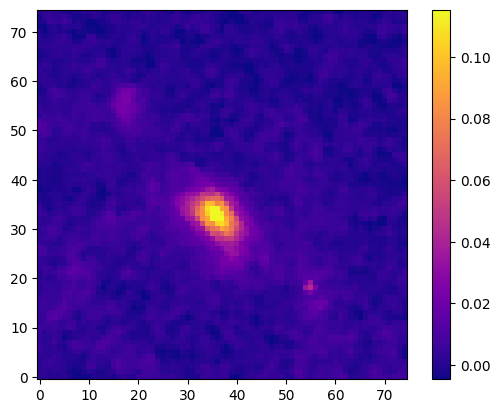

Filter: 356
Full ZFOURGE ID: 7448 vs Google Drive ZFOURGE ID: 7448


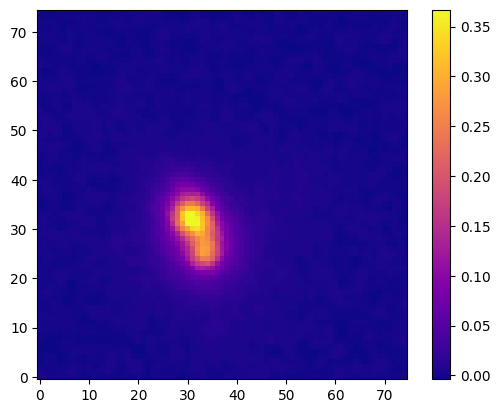

Filter: 356
Full ZFOURGE ID: 7629 vs Google Drive ZFOURGE ID: 7629


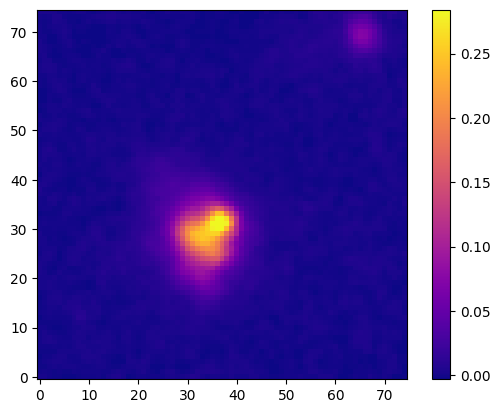

Filter: 356
Full ZFOURGE ID: 7706 vs Google Drive ZFOURGE ID: 7706


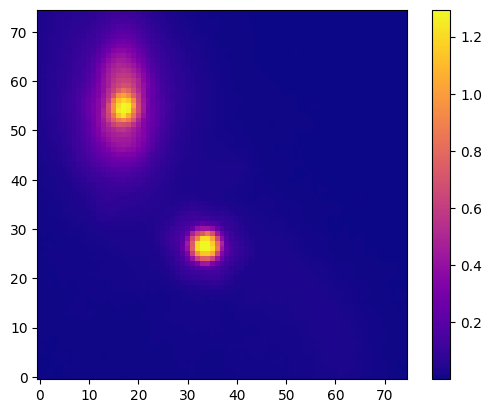

Filter: 356
Full ZFOURGE ID: 7814 vs Google Drive ZFOURGE ID: 7814


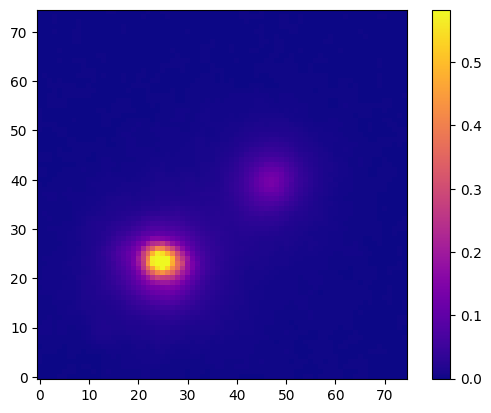

Filter: 356
Full ZFOURGE ID: 7836 vs Google Drive ZFOURGE ID: 7836


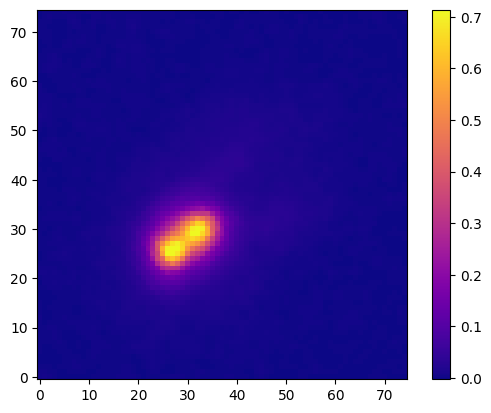

Filter: 356
Full ZFOURGE ID: 7856 vs Google Drive ZFOURGE ID: 7856


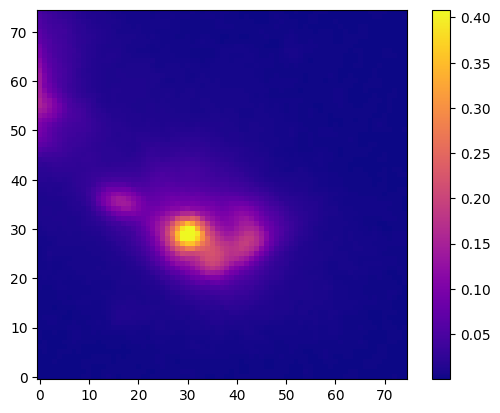

Filter: 356
Full ZFOURGE ID: 7867 vs Google Drive ZFOURGE ID: 7867


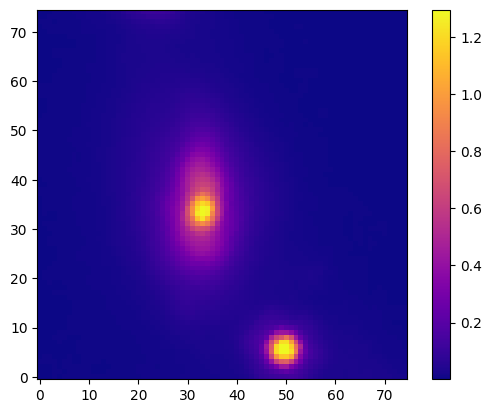

Filter: 356
Full ZFOURGE ID: 7887 vs Google Drive ZFOURGE ID: 7887


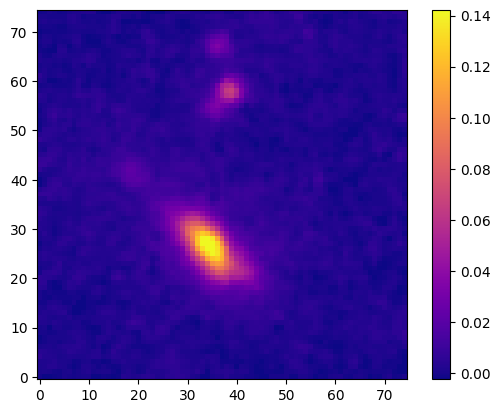

Filter: 356
Full ZFOURGE ID: 7932 vs Google Drive ZFOURGE ID: 7932


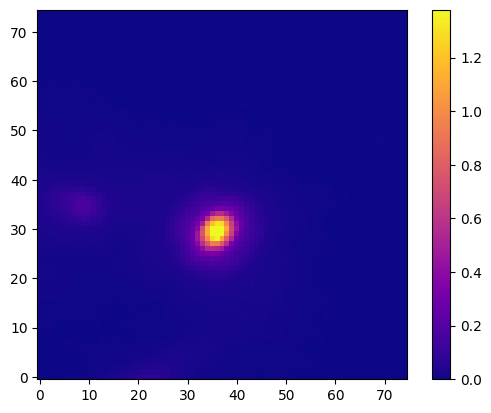

Filter: 356
Full ZFOURGE ID: 7968 vs Google Drive ZFOURGE ID: 7968


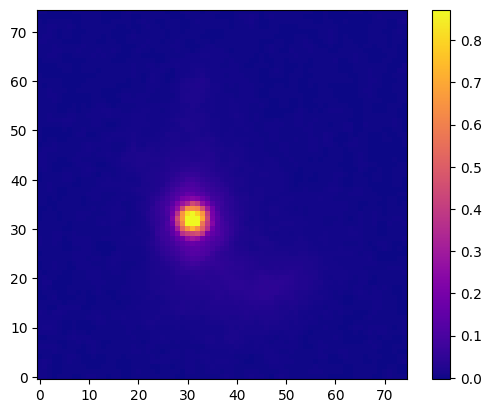

Filter: 356
Full ZFOURGE ID: 8020 vs Google Drive ZFOURGE ID: 8020


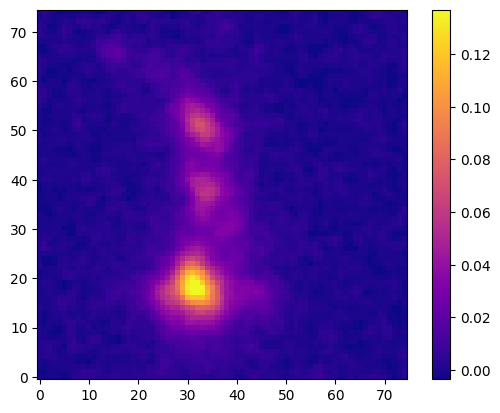

Filter: 356
Full ZFOURGE ID: 8074 vs Google Drive ZFOURGE ID: 8074


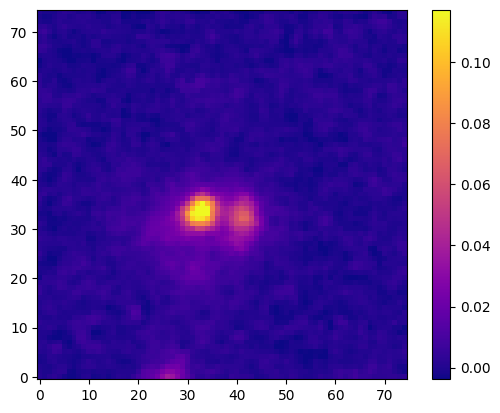

Filter: 356
Full ZFOURGE ID: 8116 vs Google Drive ZFOURGE ID: 8116


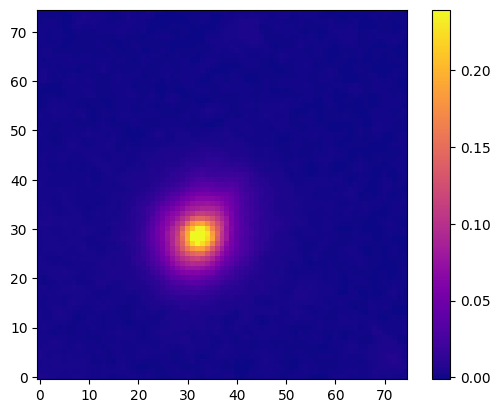

Filter: 356
Full ZFOURGE ID: 8131 vs Google Drive ZFOURGE ID: 8131


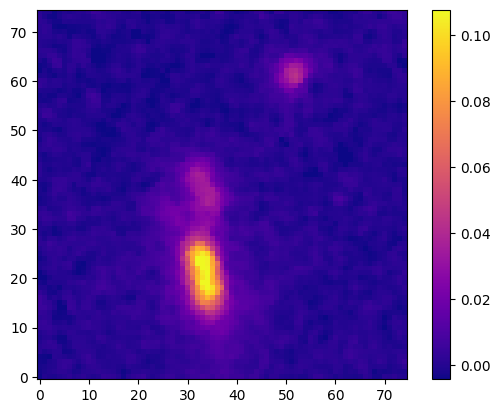

Filter: 356
Full ZFOURGE ID: 8206 vs Google Drive ZFOURGE ID: 8206


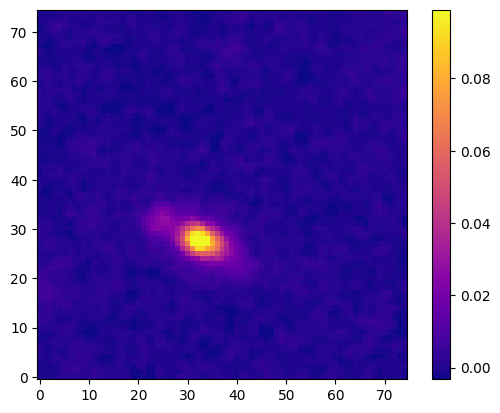

Filter: 356
Full ZFOURGE ID: 8207 vs Google Drive ZFOURGE ID: 8207


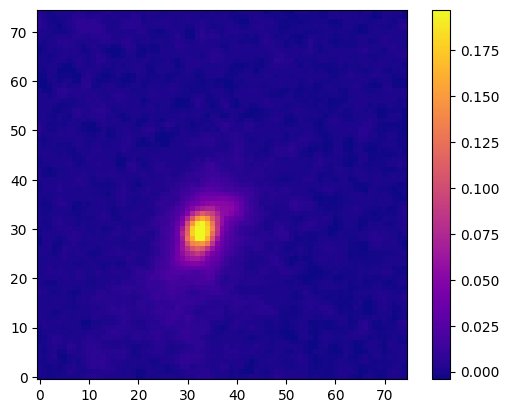

Filter: 356
Full ZFOURGE ID: 8316 vs Google Drive ZFOURGE ID: 8316


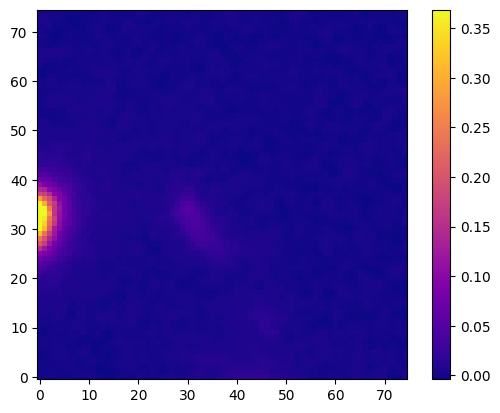

Filter: 356
Full ZFOURGE ID: 8366 vs Google Drive ZFOURGE ID: 8366


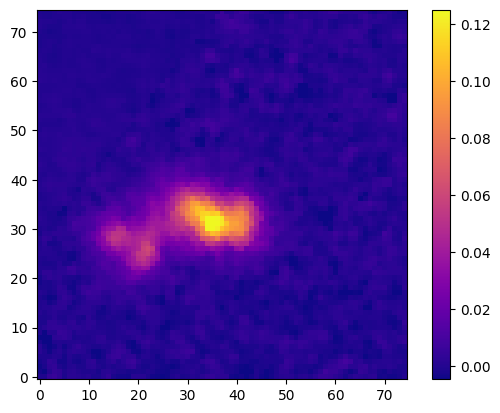

Filter: 356
Full ZFOURGE ID: 8643 vs Google Drive ZFOURGE ID: 8643


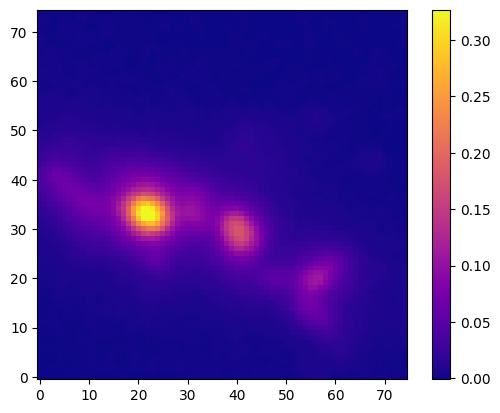

Filter: 356
Full ZFOURGE ID: 8706 vs Google Drive ZFOURGE ID: 8706


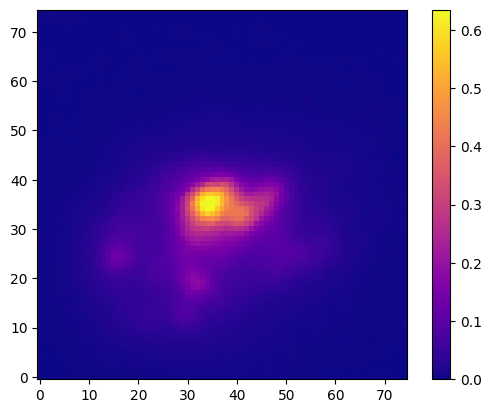

Filter: 356
Full ZFOURGE ID: 8851 vs Google Drive ZFOURGE ID: 8851


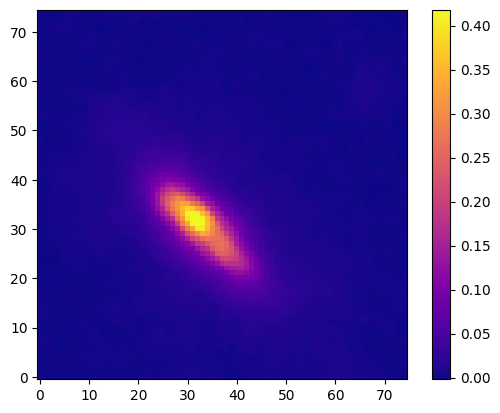

KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5

missing_galaxies = set()
print(len(missing_galaxies))
    
bad_galaxies = [12030, 12694, 12824, 16706, 10112, 7453, 10330, 11068, 14122, 18645, 19762, 21297, 21435, 24110]

def cut_galaxies(file_name,filter, hdu):
    # Load the FITS file and WCS header
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'  # Path to your catalog file
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'  # Path to your FITS image

    # Read the catalog file to get RA/DEC values (assuming 2 columns: RA, DEC)
    data = pd.read_csv(cat_file, sep=' ', header=0)  # Adjust delimiter if needed
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    # Open the FITS image to get the data and header
    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header

    # Initialize WCS object
    wcs = WCS(header)

    size = (75,75)*u.pixel
    
    for i in int_ids:
        # pos = SkyCoord(53.16285502, -27.77169206, unit='deg', frame='icrs')
        pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')

        cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
        
        # Check if the entire cutout is zero
        if np.sum(cutout.data) == 0:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue  # Skip to the next iteration if the galaxy is missing
        elif i in missing_galaxies:
            continue
        else:
            match_ids = data['id'].values
            print(f'Filter: {filter}')
            print(f'Full ZFOURGE ID: {match_ids[i-1]} vs Google Drive ZFOURGE ID: {i}')
            plt.imshow(cutout.data, cmap='plasma', origin='lower', vmax=np.percentile(cutout.data, 99.9), vmin=np.percentile(cutout.data, 1))
            plt.colorbar()
            plt.show()

cut_galaxies('jades_356', 356, 1)
cut_galaxies('fresco_814', 814, 0)
cut_galaxies('fresco_160', 160, 0)

In [10]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy.coordinates import SkyCoord

missing_galaxies = set()
bad_galaxies = [12030, 12694, 12824]
# bad_galaxies = [12030, 12694, 12824, 16706, 10112, 7453, 10330, 11068, 14122, 18645, 19762, 21297, 21435, 24110]

def cut_galaxies(file_name, filter, hdu):
    cat_file = '/home/juliantearney/Downloads/cdfs_v1_6_11.cat'
    fits_file = f'/home/juliantearney/Downloads/{file_name}.fits'
    data = pd.read_csv(cat_file, sep=' ', header=0)
    data.columns = ['id', 'x', 'y', 'ra', 'dec', 'SEflags', 'iso_area', 'fap_Ksall', 'eap_Ksall', 'apcorr', 'Ks_ratio', 'fapcirc07_Ksall', 'eapcirc07_Ksall', 'apcorr07', 'fcirc07_Ksall', 'ecirc07_Ksall', 'fauto_Ksall', 'flux50_radius', 'a_vector', 'b_vector', 'kron_radius', 'f_Ksall', 'e_Ksall', 'w_Ksall', 'f_B', 'e_B', 'w_B', 'f_I', 'e_I', 'w_I', 'f_R', 'e_R', 'w_R', 'f_U', 'e_U', 'w_U', 'f_V', 'e_V', 'w_V', 'f_Z', 'e_Z', 'w_Z', 'f_Hs', 'e_Hs', 'w_Hs', 'f_Hl', 'e_Hl', 'w_Hl', 'f_J1', 'e_J1', 'w_J1', 'f_J2', 'e_J2', 'w_J2', 'f_J3', 'e_J3', 'w_J3', 'f_Ks', 'e_Ks', 'w_Ks', 'f_KsHI', 'e_KsHI', 'w_KsHI', 'f_NB118', 'e_NB118', 'w_NB118', 'f_NB209', 'e_NB209', 'w_NB209', 'f_F098M', 'e_F098M', 'w_F098M', 'f_F105W', 'e_F105W', 'w_F105W', 'f_F125W', 'e_F125W', 'w_F125W', 'f_F140W', 'e_F140W', 'w_F140W', 'f_F160W', 'e_F160W', 'w_F160W', 'f_F814W', 'e_F814W', 'w_F814W', 'f_IA484', 'e_IA484', 'w_IA484', 'f_IA527', 'e_IA527', 'w_IA527', 'f_IA574', 'e_IA574', 'w_IA574', 'f_IA598', 'e_IA598', 'w_IA598', 'f_IA624', 'e_IA624', 'w_IA624', 'f_IA651', 'e_IA651', 'w_IA651', 'f_IA679', 'e_IA679', 'w_IA679', 'f_IA738', 'e_IA738', 'w_IA738', 'f_IA767', 'e_IA767', 'w_IA767', 'f_IA797', 'e_IA797', 'w_IA797', 'f_IA856', 'e_IA856', 'w_IA856', 'f_WFI_V', 'e_WFI_V', 'w_WFI_V', 'f_WFI_Rc', 'e_WFI_Rc', 'w_WFI_Rc', 'f_WFI_U38', 'e_WFI_U38', 'w_WFI_U38', 'f_tenisK', 'e_tenisK', 'w_tenisK', 'f_IRAC_36', 'e_IRAC_36', 'w_IRAC_36', 'f_IRAC_45', 'e_IRAC_45', 'w_IRAC_45', 'f_IRAC_58', 'e_IRAC_58', 'w_IRAC_58', 'f_IRAC_80', 'e_IRAC_80', 'w_IRAC_80', 'wmin_optical', 'wmin_hst_optical', 'wmin_fs', 'wmin_jhk', 'wmin_hst', 'wmin_irac', 'wmin_all', 'star', 'nearstar', 'use', 'snr', 'use_nosnr', 'z_spec', 'garbage']
    ra_values = data['ra'].values
    dec_values = data['dec'].values

    with fits.open(fits_file) as hdul:
        image_data = hdul[hdu].data
        header = hdul[hdu].header

    wcs = WCS(header)
    size = (75,75)*u.pixel
    cutouts = {}

    for i in int_ids:
        pos = SkyCoord(ra_values[i-1], dec_values[i-1], unit='deg', frame='icrs')
        cutout = Cutout2D(image_data, pos, size=size, wcs=wcs)
        
        if np.sum(cutout.data) == 0 or data['id'].iloc[i-1] in bad_galaxies:
            missing_galaxies.add(data['id'].iloc[i-1])
            continue
        elif i in missing_galaxies:
            continue
        else:
            cutouts[data['id'].iloc[i-1]] = cutout.data
    
    return cutouts

cut_galaxies('jades_356', 356, 1)
# Collect cutouts for each filter
cutouts_356 = cut_galaxies('jades_356', 356, 1)
cutouts_814 = cut_galaxies('fresco_814', 814, 0)
cutouts_160 = cut_galaxies('fresco_160', 160, 0)

combined_cutouts_list = []
for galaxy_id in cutouts_356.keys():
    if galaxy_id in cutouts_814 and galaxy_id in cutouts_160:
        combined_cutouts_list.append([
            cutouts_356[galaxy_id],
            cutouts_814[galaxy_id],
            cutouts_160[galaxy_id]
        ])

# Convert list to a 4D NumPy array
combined_cutouts_array = np.array(combined_cutouts_list)

# Save the 4D array to a single FITS file
hdu = fits.PrimaryHDU(data=combined_cutouts_array)
hdu_list = fits.HDUList([hdu])
hdu_list.writeto(dir_test + 'combined_cutouts.fits', overwrite=True)

Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-10-08T01:38:08.426' from MJD-AVG.
Set DATE-END to '2022-10-08T04:53:29.401' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    22.225686 from OBSGEO-[XYZ].
Set OBSGEO-H to 1235003121.785 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
print(missing_galaxies)
print(len(missing_galaxies))

{10112, 20988, 19843, 19590, 23047, 16907, 22545, 10388, 11541, 12694, 15639, 12824, 21012, 9371, 23841, 18724, 16933, 21542, 22309, 23589, 17705, 21678, 20146, 24500, 21430, 22654, 20027, 24506, 22909, 16705, 21955, 17477, 23751, 16717, 23421, 23511, 18776, 7129, 21210, 7387, 21090, 20836, 10730, 10092, 20720, 16113, 22768, 24179, 23412, 9845, 21621, 16764, 18685, 12030}
54
